<a href="https://colab.research.google.com/github/neerajsk911/Emotional-Analysis-for-Suitable-Music-Recomendation/blob/main/Emotional_Analysis_and_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Analysis and Suitable Music Recommendation - 19CSE305 - Group 5**

# ***Visualizations and Analysis***

## ***Imports***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## ***Getting the Normalized dataset***

In [ ]:
dataset=pd.read_csv("dataset/normalized_2.csv")

## ***Dataset Specs***

In [ ]:
display(dataset.head())
print(f"Dataset Shape:{dataset.shape}")

acousticness  danceability  energy  instrumentalness       key  liveness  \
0         0.995         0.708  0.1950             0.563  0.909091    0.1510   
1         0.994         0.379  0.0135             0.901  0.727273    0.0763   
2         0.995         0.781  0.1300             0.887  0.090909    0.1110   
3         0.995         0.683  0.2070             0.206  0.818182    0.3370   
4         0.994         0.376  0.0719             0.883  0.909091    0.1960   

   loudness  mode release_date  speechiness     tempo  valence  duration_ms  \
0  0.767748     1         1928       0.0506  0.500293   0.7790       158648   
1  0.509110     1         1928       0.0462  0.354613   0.0767       282133   
2  0.730533     0   1928-09-25       0.0926  0.456096   0.7200       180760   
3  0.810145     0   1928-10-03       0.1270  0.506054   0.4930       162493   
4  0.615706     0         1928       0.0352  0.597089   0.0393       590293   

   explicit  popularity  year                                       artists  \
0         0           0  1928                           ['Carl Woitschach']   
1         0           0  1928      ['Robert Schumann', 'Vladimir Horowitz']   
2         0           0  1928                          ['Francisco Canaro']   
3         0           0  1928                ['Francisco Canaro', 'Charlo']   
4         0           0  1928  ['Sergei Rachmaninoff', 'Vladimir Horowitz']   

                       id                                               name  
0  6KbQ3uYMLKb5jDxLF7wYDD                        Singende Bataillone 1. Teil  
1  6KuQTIu1KoTTkLXKrwlLPV           Fantasiestücke, Op. 111: Più tosto lento  
2  6M94FkXd15sOAOQYRnWPN8      Bebamos Juntos - Instrumental (Remasterizado)  
3  6OaJ8Bh7lsBeYoBmwmo2nh                   Moneda Corriente - Remasterizado  
4  6QBInZBkQNIQYU9gGzT5l4  Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....

Dataset Shape:(42477, 19)


**From the above analysis, ```danceability```, ```valence```, ```energy``` appears to have a small relation**

# ***Facial Emotion Analysis***

In [ ]:
import cv2 
def getCVCapture():
    key = cv2. waitKey(1)
    webcam = cv2.VideoCapture(1)
    while True:
        try:
            check, frame = webcam.read()
            cv2.imshow("Capturing", frame)
            key = cv2.waitKey(1)
            if key == ord('s'): 
                cv2.imwrite(filename='test.jpg', img=frame)
                webcam.release()
                img_new = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
                img_new = cv2.imshow("Captured Image", img_new)
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                break
            elif key == ord('q'):
                webcam.release()
                cv2.destroyAllWindows()
                break
            
        except(KeyboardInterrupt):
            webcam.release()
            cv2.destroyAllWindows()
            break

Major Emotion:happy
All Emotions:[('happy', 0.88), ('neutral', 0.07), ('angry', 0.02), ('sad', 0.01), ('disgust', 0.0), ('fear', 0.0), ('surprise', 0.0)]


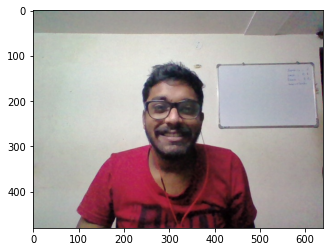

In [ ]:
from fer import FER

getCVCapture()
img = plt.imread("test.jpg")
detector = FER(mtcnn=True)
emotion=detector.detect_emotions(img)[0]["emotions"]
emotion=sorted(emotion.items(),key=lambda x: x[1],reverse=True)
print(f"Major Emotion:{emotion[0][0]}")
print(f"All Emotions:{emotion}")
plt.imshow(img)
pass

# ***Analysis of the Training Models***

## ***Imports and Feature Selection***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

sns.set()
pd.options.mode.chained_assignment = None

moods_org=pd.read_csv("dataset/cleaned_music_dataset.csv")

In [ ]:
columns=sorted(["acousticness","danceability","energy","instrumentalness","key","liveness","loudness","speechiness","tempo","valence"])
X=moods_org[columns].values
Y=moods_org["mood"].values

song_moods=["Calm","Energetic","Happy","Sad"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=911)

## ***Unsupervised | K-means Clustering***

### ***Clustering the data***

In [ ]:
from sklearn.cluster import KMeans

X_old=X
kmeans = KMeans(n_clusters=4, random_state=911).fit(X)
Y_pred_kmeans=kmeans.fit_predict(X)

### ***Analysing the clusters and possible class labels***

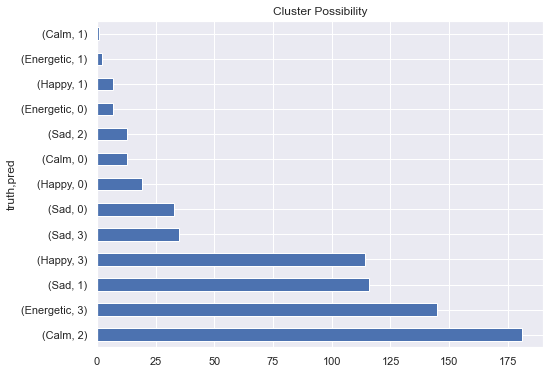

In [ ]:
kmeans=pd.DataFrame()
kmeans["truth"]=Y
kmeans["pred"]=Y_pred_kmeans
plt.figure(figsize=(8,6))
kmeans.value_counts().plot(kind="barh")
plt.title("Cluster Possibility")
plt.show()

### ***Comparing the cluster with ground truth***

Classified songs as:
Energetic    294
Calm         194
Sad          126
Happy         72
Name: pred, dtype: int64

Classification Report:

              precision    recall  f1-score   support

        Calm       0.93      0.93      0.93       195
   Energetic       0.49      0.94      0.65       154
       Happy       0.26      0.14      0.18       140
         Sad       0.92      0.59      0.72       197

    accuracy                           0.67       686
   macro avg       0.65      0.65      0.62       686
weighted avg       0.69      0.67      0.65       686



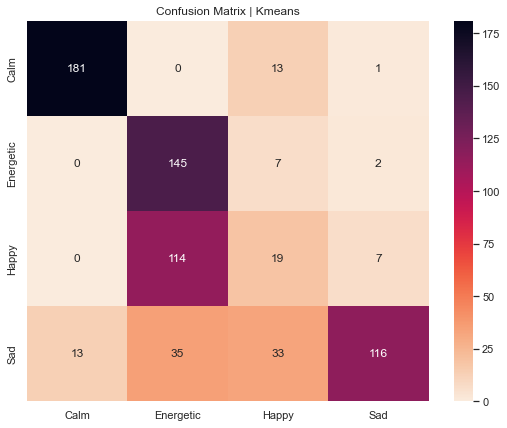

In [ ]:
repl=kmeans["pred"].values

repl=np.where(repl==0,"Happy",repl)
repl=np.where(repl=="1","Sad",repl)
repl=np.where(repl=="2","Calm",repl)
repl=np.where(repl=="3","Energetic",repl)

kmeans["pred"]=repl

print(f"Classified songs as:\n{kmeans['pred'].value_counts()}",end="\n\n")
cfn_m=confusion_matrix(Y,repl)
plt.figure(figsize=(9,7))
sns.heatmap(cfn_m,xticklabels=song_moods,yticklabels=song_moods,annot=True,fmt='g',cmap="rocket_r")
plt.title("Confusion Matrix | Kmeans")
print(f"Classification Report:\n\n{classification_report(Y,repl)}")

## ***KNN - Sklearn***

### ***Classification***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=7).fit(X_train,Y_train)
Y_pred_knn=classifier.predict(X_test)

### ***Reports***

Classified songs as:
Calm         38
Sad          38
Energetic    33
Happy        29
dtype: int64



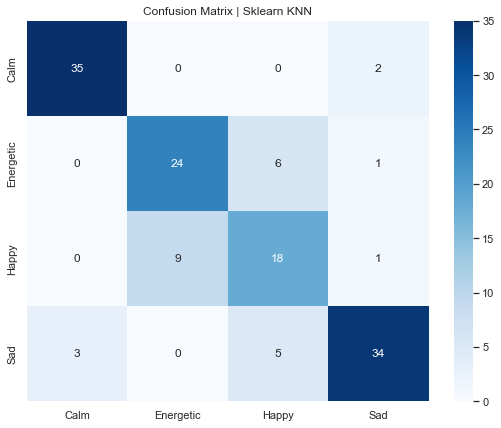

Classification Report:

              precision    recall  f1-score   support

        Calm       0.92      0.95      0.93        37
   Energetic       0.73      0.77      0.75        31
       Happy       0.62      0.64      0.63        28
         Sad       0.89      0.81      0.85        42

    accuracy                           0.80       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.81      0.80      0.81       138



In [ ]:
print(f"Classified songs as:\n{pd.DataFrame(Y_pred_knn).value_counts()}",end="\n\n")
cfn_knn=confusion_matrix(Y_test,Y_pred_knn)

plt.figure(figsize=(9,7))
plt.title("Confusion Matrix | Sklearn KNN")
sns.heatmap(cfn_knn,xticklabels=song_moods,yticklabels=song_moods,annot=True,cmap="Blues")
plt.show()
print(f"Classification Report:\n\n{classification_report(Y_test,Y_pred_knn)}")

## ***Decision Tree - Sklearn***

### ***Classification***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=10).fit(X_train,Y_train)
Y_pred_tree = decisionTree.predict(X_test)

### ***Reports***

Classified songs as:
Sad          47
Calm         36
Happy        29
Energetic    26
dtype: int64



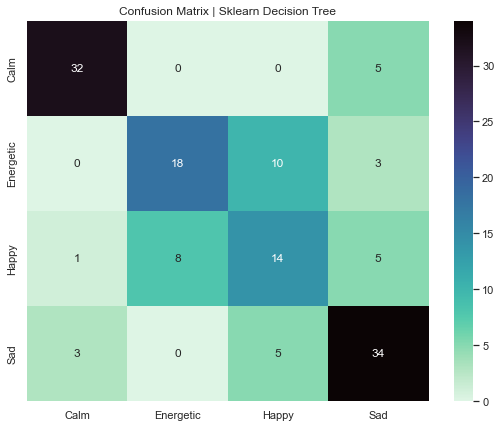

Classification Report:

              precision    recall  f1-score   support

        Calm       0.89      0.86      0.88        37
   Energetic       0.69      0.58      0.63        31
       Happy       0.48      0.50      0.49        28
         Sad       0.72      0.81      0.76        42

    accuracy                           0.71       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.71      0.71      0.71       138



In [ ]:
print(f"Classified songs as:\n{pd.DataFrame(Y_pred_tree).value_counts()}",end="\n\n")
cfn_tree=confusion_matrix(Y_test,Y_pred_tree)

plt.figure(figsize=(9,7))
plt.title("Confusion Matrix | Sklearn Decision Tree")
sns.heatmap(cfn_tree,xticklabels=song_moods,yticklabels=song_moods,annot=True,cmap="mako_r")
plt.show()
print(f"Classification Report:\n\n{classification_report(Y_test,Y_pred_tree)}")

## ***Naive Bayes - Sklearn***

### ***Analysing Correlations***

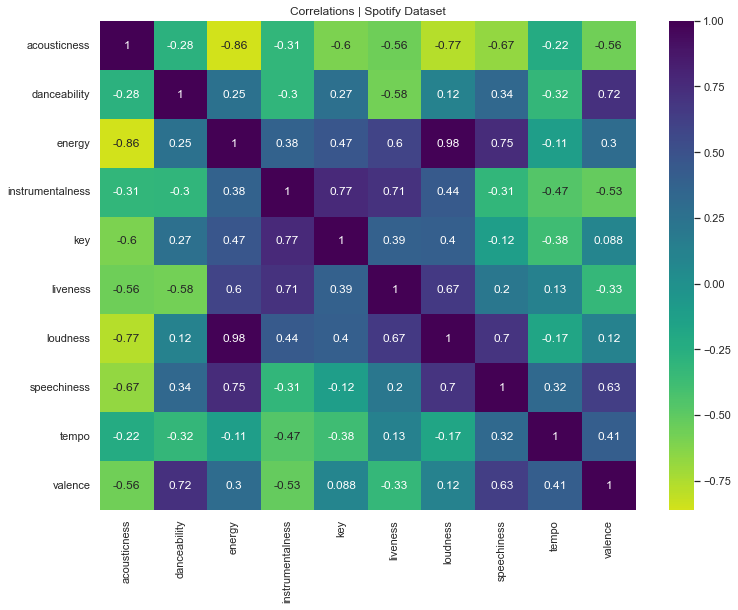

In [ ]:
plt.figure(figsize=(12,9))
plt.title("Correlations | Spotify Dataset")
sns.heatmap(moods_org[columns].head().corr(),annot=True,center=0,cmap="viridis_r")
pass

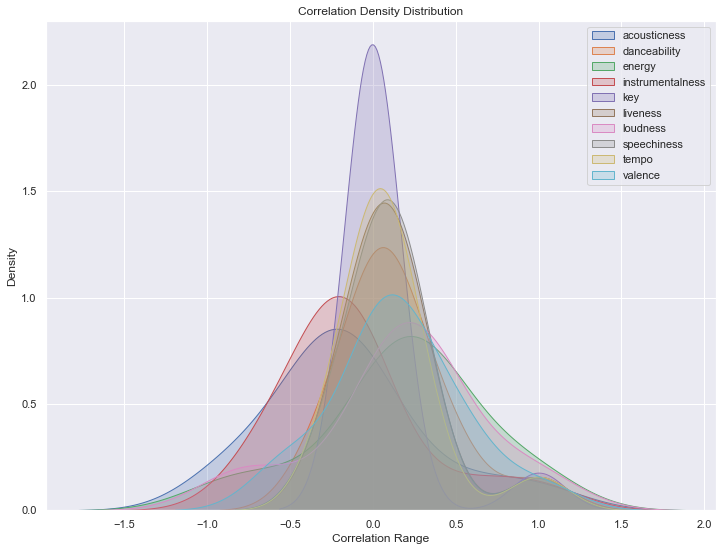

In [ ]:
plt.figure(figsize=(12,9))
plt.xlabel("Correlation Range")
plt.title("Correlation Density Distribution")
for column in columns:
    sns.kdeplot(data=moods_org.corr(),x=column,shade=True,label=column)
plt.legend()
pass

### ***Classification***

In [ ]:
from sklearn.naive_bayes import GaussianNB
Y_pred_nb=GaussianNB().fit(X_train,Y_train).predict(X_test)

### ***Reports***

Classified songs as:
Sad          40
Calm         37
Energetic    34
Happy        27
dtype: int64



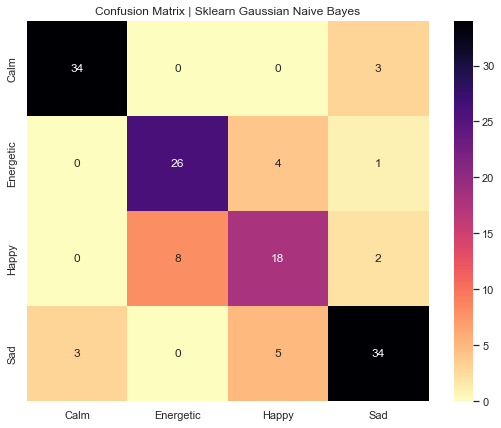

Classification Report:

              precision    recall  f1-score   support

        Calm       0.92      0.92      0.92        37
   Energetic       0.76      0.84      0.80        31
       Happy       0.67      0.64      0.65        28
         Sad       0.85      0.81      0.83        42

    accuracy                           0.81       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.81      0.81      0.81       138



In [ ]:
print(f"Classified songs as:\n{pd.DataFrame(Y_pred_nb).value_counts()}",end="\n\n")
cfn_log_reg=confusion_matrix(Y_test,Y_pred_nb)

plt.figure(figsize=(9,7))
plt.title("Confusion Matrix | Sklearn Gaussian Naive Bayes")
sns.heatmap(cfn_log_reg,xticklabels=song_moods,yticklabels=song_moods,annot=True,cmap="magma_r")
plt.show()
print(f"Classification Report:\n\n{classification_report(Y_test,Y_pred_nb)}")

## ***Logistic Regression - Sklearn***

### ***Classification***

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(random_state=911).fit(X_train, Y_train)
Y_pred_log_reg=log_reg.predict(X_test)

### ***Reports***

Classified songs as:
Calm         39
Sad          36
Energetic    34
Happy        29
dtype: int64



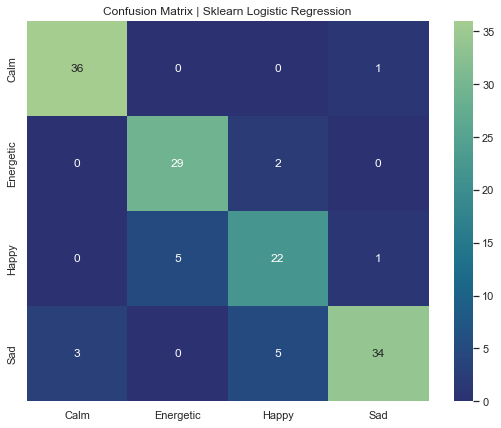

Classification Report:

              precision    recall  f1-score   support

        Calm       0.92      0.97      0.95        37
   Energetic       0.85      0.94      0.89        31
       Happy       0.76      0.79      0.77        28
         Sad       0.94      0.81      0.87        42

    accuracy                           0.88       138
   macro avg       0.87      0.88      0.87       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
print(f"Classified songs as:\n{pd.DataFrame(Y_pred_log_reg).value_counts()}",end="\n\n")
cfn_log_reg=confusion_matrix(Y_test,Y_pred_log_reg)

plt.figure(figsize=(9,7))
plt.title("Confusion Matrix | Sklearn Logistic Regression")
sns.heatmap(cfn_log_reg,xticklabels=song_moods,yticklabels=song_moods,annot=True,cmap="crest_r")
plt.show()
print(f"Classification Report:\n\n{classification_report(Y_test,Y_pred_log_reg)}")

## ***Final Calls on Model Selection***

<style>
    #final-calls{
        font-weight: bold;
        font-size: 1.2em;
        font-style: italic;
    }

    li,#li{
        font-size:1em;
        font-weight:normal;
        font-style: italic;
    }

    #large{
        font-size:1.2em;
        font-style: italic;
    }

</style>

The following models were tested out above:
* Supervised Learning Algorithms (Accuracy):
    * <span id="li">K-Nearest Neighbours (80%)</span>
    * <span id="li">Decision Tree (~71%)</span>
    * <span id="li">Logistic Regression (88%)</span>
    * <span id="li">Gaussian Naive Bayes (81%)</span>
<br><br>
* Unsupervised Learning Algorithms (Accuracy):
    * <span id="li">K-means Clustering (~67%)</span>

<br>

<span id="large">Inferences</span><hr>

<span id="final-calls">-The Supervised Learning Algorithms were trained using a similar but small dataset (~1% of original dataset) in which the moods of the songs were prerecorded. However in a real world scenario, to tackle a similar problem Unsupervised Algorithms are used as there is no simple way to estimate moods of the songs rather than identifying patterns within them.</span>
<br><br>

<span id="final-calls">-The accuracy of the results of Clustering on the small dataset cannot be considered to be reliable as the size of the dataset was very small to perform efficient clustering and as a result the accuracy can preferably go up when applied on a larger dataset.</span>
<br><br>

<span id="final-calls">-Thus we will be applying KMeans Clustering on the large dataset to cluster the data to different moods and will be trying to evaluate its performance using the Logistic Regression model that was trained earlier with an accuracy of 88%.</span>

# ***Building the Recommendation System***

## ***Predicting moods of the new dataset***

### ***Loading the Output dataset and setting up training samples***

<style>
    p,ul{
        /* font-weight: bold; */
        font-size: 1.2em;
        font-style: italic;
    }

    #li{
        font-size:0.8em;
        font-weight:normal;
    }
</style>

Spotify dataset has already been initialized in the visualization step and its features will be provided as input to the Logistic Regression model trained using the smaller dataset wherein the moods are already known

In [ ]:
X_train_final,Y_train_final=X,Y
input_features=dataset[columns].values

### ***Logistic Regression***

In [ ]:
lr=LogisticRegression(random_state=911).fit(X_train_final,Y_train_final)
Y_pred_lr_final=lr.predict(input_features)

<style>
    p,ul{
        /* font-weight: bold; */
        font-size: 1.2em;
        font-style: italic;
    }

    #li{
        font-size:0.8em;
        font-weight:normal;
    }
</style>

Saving the result of Logistic Regression to the Dataframe and merging the Energetic and Happy moods together as they overlap each other

In [ ]:
dataset["log_reg"]=Y_pred_lr_final

dataset["log_reg"].replace(to_replace="Energetic",value="Happy",inplace=True)
dataset["log_reg"].value_counts()

Sad      19792
Happy    18355
Calm      4330
Name: log_reg, dtype: int64

### ***KMeans Clustering***

#### ***Setting up a new dataframe to work with***

In [ ]:
new_ds=dataset.copy()[columns]
X=new_ds.values

#### ***Randomly picking a Centroid with a specified random state to avoid change during rerun***

In [ ]:
import random
random.seed(911)
starting_centroids=random.sample(range(X.shape[0]),3)
starting_centroids

[29967, 25563, 25981]

#### ***Copying the values in the Centroid Indices***

In [ ]:
centroids=[]
for points in starting_centroids:
    centroids.append(X[points])
centroids=np.array(centroids)

#### ***Function | Finding the Closest Centroid from a point***

In [ ]:
def findClosestCentroids(clusters,X):
    euclidean_distance=lambda X,Y:np.sqrt(np.sum(np.square(X-Y)))
    calculated_centroid=[]
    current=0
    for point in X:
        current+=1
        print(f"\rData Point:{current}/{X.shape[0]} | Remaining:{X.shape[0]-current} | Progress:{round((current/X.shape[0])*100,2)}% ",end="")
        distance=[]
        for values in clusters:
            distance.append(euclidean_distance(point,values))
        calculated_centroid.append(np.argmin(distance))
    return calculated_centroid

#### ***Function | Getting the new Centroids based on mean values***

In [ ]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

#### ***Function | Iteratively applying the Mean-based Clustering to fine-tune the Clusters | Default iterates to 10***

In [ ]:
def recenter_clusters(iterations=10):
    global centroids
    prev_clusters=np.array([])
    for i in range(iterations):
        print(f"Iteration {i+1}:")
        get_centroids = findClosestCentroids(centroids, X)
        centroids = calc_centroids(get_centroids, X)
        current_clusters=pd.DataFrame(get_centroids).value_counts().values
        if np.array_equal(prev_clusters,current_clusters):
            print("No change in Clusters | Stopping")
            break
        print(f"Previously Clustered:{prev_clusters} | Currently Clustered:{current_clusters}")
        prev_clusters=current_clusters
    print()
    return get_centroids

#### ***Running the k-Means Clustering Algorithm***

In [ ]:
get_centroids=recenter_clusters()
new_ds["clustered_moods"]=get_centroids

Iteration 1:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[] | Currently Clustered:[25515 12011  4951]
Iteration 2:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[25515 12011  4951] | Currently Clustered:[18371 16660  7446]
Iteration 3:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[18371 16660  7446] | Currently Clustered:[18499 15076  8902]
Iteration 4:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[18499 15076  8902] | Currently Clustered:[19179 13370  9928]
Iteration 5:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[19179 13370  9928] | Currently Clustered:[19494 12257 10726]
Iteration 6:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[19494 12257 10726] | Currently Clustered:[19689 11540 11248]
Iteration 7:
Data Point:42477/42477 | Remaining:0 | Progress:100.0% Previously Clustered:[19689 11540 11248] | 

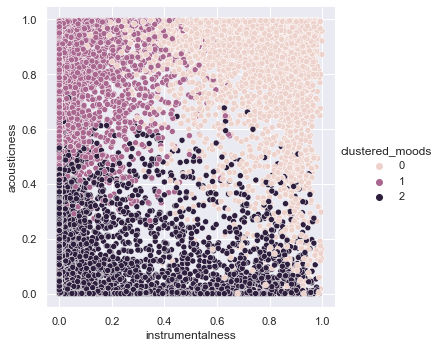

In [ ]:
sns.relplot(data=new_ds,x="instrumentalness",y="acousticness",hue="clustered_moods")

In [ ]:
import plotly.express as px
plot = px.scatter_3d(new_ds,x="instrumentalness",y="acousticness",z="valence",color="clustered_moods",symbol="clustered_moods")
plot.show()

#### ***Finding the Mood of the Clusters***

<style>
    p,ul{
        /* font-weight: bold; */
        font-size: 1em;
        font-style: italic;
    }
</style>
Here are some of the essential findings from the Initial Phases:

- Acousticness value (mean) tends to be higher for Sad and Calm Moods compared to Happy. This helps in the inter-class classification
- Among Sad and Calm moods, Calm mood appears to have a greater intensity of Instrumentalness (mean), which can be used to overcome the intra-class similarity
- Happy songs tend to have higher valence (mean)

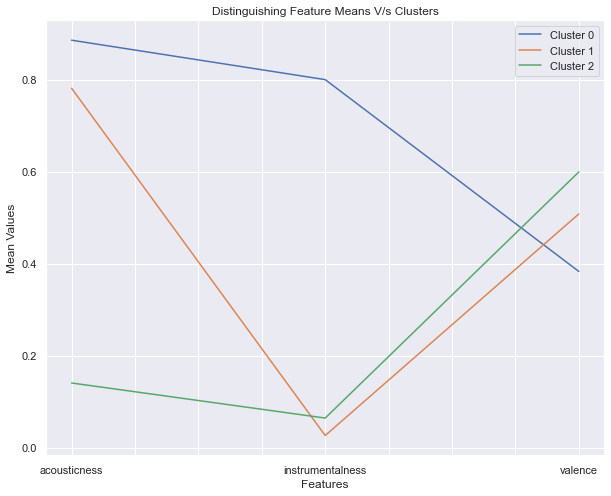

In [ ]:
import heapq
diff=["acousticness","instrumentalness","valence"]

getCol="clustered_moods"

features_0=new_ds[diff].loc[new_ds[getCol]==0].describe().T["mean"]
features_1=new_ds[diff].loc[new_ds[getCol]==1].describe().T["mean"]
features_2=new_ds[diff].loc[new_ds[getCol]==2].describe().T["mean"]

plt.figure(figsize=(10,8))
for i in range(3):
    eval(f"features_{i}.plot(label='Cluster {i}')")

plt.title("Distinguishing Feature Means V/s Clusters")
plt.xlabel("Features")
plt.ylabel("Mean Values")
plt.legend()

acs=[features_0[0],features_1[0],features_2[0]]     #Mean Acousticness 
sad_calm_values=heapq.nlargest(2,acs)               #Taking 2 largest values from the mean
sc_clusters=[]                                      #Clusters which are a good fit for Sad/Calm
he_clusters=0
for i in range(3):
    if acs[i] in sad_calm_values:
        sc_clusters.append(i)
    else:
        he_clusters=i

#### ***Naming the Clusters***

In [ ]:
sc_info=[eval(f"features_{sc_clusters[0]}[1]"),eval(f"features_{sc_clusters[1]}[1]")]
if sc_info[0]>sc_info[1]:
    calm_cluster=sc_clusters[0]
    sad_cluster=sc_clusters[1]
else:
    calm_cluster=sc_clusters[1]
    sad_cluster=sc_clusters[0]

happy_cluster=he_clusters

print(f"Cluster Classification:")
moods=["happy","calm","sad"]
for x in moods:
    print(f"Cluster {eval(f'{x}_cluster')} : {x}")

Cluster Classification:
Cluster 2 : happy
Cluster 0 : calm
Cluster 1 : sad


#### ***Updating the Moods from Cluster numbers to Names***

In [ ]:
named_clusters=pd.DataFrame(get_centroids)
for mood in moods:
    named_clusters.replace(to_replace=eval(f"{mood}_cluster"),value=mood.capitalize(),inplace=True)
new_ds["named_moods"]=named_clusters.values

#### ***Projecting the Output to the Original Dataframe Object***

In [ ]:
dataset["named_moods"]=new_ds["named_moods"].values

### ***Comparing the Outcomes of Supervised Logistic Regression and Unsupervised k-Mean Clustering***

<style>
    #res{
        font-size: 1.2em;
        font-style: italic;
    }
</style>
<span id="res">As seen earlier, Logistic Regression was trained using a small dataset (~1% of the Spotify Dataset), owing to which the results from Logistic Regression cannot be considered to be ground truth indeed, but will be better compared to other algorithms. The Accuracy of k-Means algorithm from scratch to that of Logistic Regression is as shown:</span>

Classification Report:

              precision    recall  f1-score   support

        Calm       0.67      1.00      0.80      4330
       Happy       0.85      0.94      0.89     18355
         Sad       0.93      0.75      0.83     19792

    accuracy                           0.86     42477
   macro avg       0.82      0.89      0.84     42477
weighted avg       0.87      0.86      0.85     42477



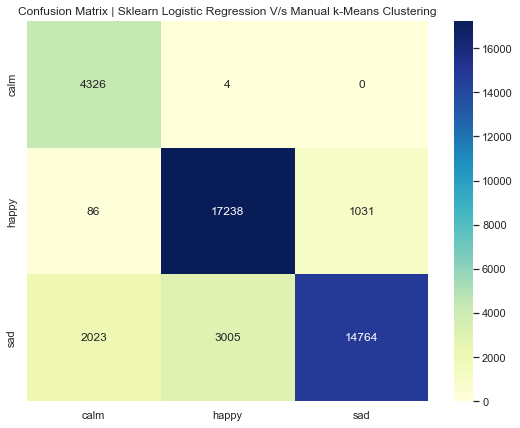

In [ ]:
print(f"Classification Report:\n\n{classification_report(dataset['log_reg'].values,dataset['named_moods'].values)}")
cfn_final=confusion_matrix(dataset["log_reg"].values,dataset["named_moods"].values)
plt.figure(figsize=(9,7))
plt.title("Confusion Matrix | Sklearn Logistic Regression V/s Manual k-Means Clustering")
sns.heatmap(cfn_final,xticklabels=sorted(moods),yticklabels=sorted(moods),annot=True,fmt='g',cmap="YlGnBu")
plt.show()

<style>
    p,ul{
        font-weight: bold;
        font-size: 1.2em;
        font-style: italic;
    }

    #li{
        font-size:0.8em;
        font-weight:normal;
    }
</style>
Therefore, K-means Clustering on the Large Dataset works efficient enough with an accuracy of 86%

### ***Saving the Output Features***

In [ ]:
dataset.to_csv("dataset/predicted_mood.csv")

## ***Song Recommendation***

<style>
    p,ul{
        font-weight: bold;
        font-size: 1.2em;
        font-style: italic;
    }
</style>
Here we will be using the output from the initial Face Analysis by 'fer' library to generate our playlist. The 'fer' library generates 7 kinds of abstract human emotions which will be mapped to its best similar Song mood (Happy, Sad, Calm)

### ***Mapping Emotions and Moods and Setting up Customized Greets!***

In [ ]:
happy_msg=["Feeling Lucky Huh!","Smile as you are now always!","Lets keep the day up!"]
sad_msg=["Hmmm! Not all days go well :("]
calm_msg=["Let's Chill up a bit!","Let's Punch the Stress together now!"]
hybrid_msg=["Let's kick your Mood up!", "Let's get you going!"]
default="Here is a {time:.2f} hr long Playlist recommended for you:"

happy_moods=["happy","surprise"]
sad_moods=["sad"]
happy_hybrid=["neutral"]
calm_moods=["angry","disgust","fear"]

major_emotion=emotion[0][0]
print(major_emotion)

happy


In [ ]:
# major_emotion="angry"
# major_emotion="neutral"
# major_emotion="happy"
# major_emotion="sad"

### ***Getting the Playlist***

In [ ]:
songs=dataset[["name","id","named_moods","duration_ms"]]
msg_category=""

if major_emotion in happy_moods:
    res=songs.loc[songs["named_moods"]=="Happy"]
    res=res.sample(10)
    msg_category="happy_msg"

elif major_emotion in sad_moods:
    res=songs.loc[songs["named_moods"]=="Sad"]
    res=res.sample(5)
    extra=songs.loc[songs["named_moods"]=="Calm"]
    extra=extra.sample(5)
    res=res.append(extra)
    msg_category="sad_msg"


elif major_emotion in calm_moods:
    res=songs.loc[songs["named_moods"]=="Calm"]
    res=res.sample(10)
    msg_category="calm_msg"


elif major_emotion in happy_hybrid:
    res=songs.loc[songs["named_moods"]=="Calm"]
    res=res.sample(5)
    extra=songs.loc[songs["named_moods"]=="Happy"]
    extra=extra.sample(5)
    res=res.append(extra)
    msg_category="hybrid_msg"

# drp_cls=["duration_ms","named_moods"]
drp_cls=["duration_ms"]
time_convert=lambda ms: ms/3.6e+6
duration=time_convert(np.sum(res["duration_ms"].values))

suggested=res.drop(columns=drp_cls).sample(10)
# suggested=res.sample(10)

suggested.reset_index(drop=True,inplace=True)
print(random.sample(eval(msg_category),1)[0])
print(default.format(time=duration))
initial_song=suggested["id"].values[0]
display(suggested)
print()

Feeling Lucky Huh!
Here is a 0.59 hr long Playlist recommended for you:


name                      id  \
0                     Personal Jesus - 2006 Remaster  7dhM0KUBxuZV9z5iNodLyn   
1                                Hasta El Sol De Hoy  5WclvUYBMB0461AqVf2SNm   
2                                Those Were The Days  5iagU6Cu2OWCahju7T4iDL   
3                                     Naturally Mine  36D17NtLW9KsIlPJ78gBgM   
4            Checkin' Up On My Baby - Single Version  2OhZ7z0LwACA5mi1t8vuxx   
5                                            Destino  788MJUGdfIQXUuLwiDw7NC   
6                                           Kohoutek  0MofLGsMKV4OS56pEXkX3R   
7                 Gimme Some Truth - Remastered 2010  3d2oiHuHm3rftzRDPeL5LU   
8  The Ballad of Jed Clampett (with The Foggy Mou...  0bJMzkuc9vIr4qw4Deqfsd   
9                                          Neo Seoul  4Us1fYjKY8obaermNIkPYT   

  named_moods  
0       Happy  
1       Happy  
2       Happy  
3       Happy  
4       Happy  
5       Happy  
6       Happy  
7       Happy  
8       Happy  
9       Happy

### ***Playing on Spotify***

In [ ]:
import webbrowser
webbrowser.open(f"spotify:track:{initial_song}")

True

<style>
    #last{
        font-weight: bold;
        font-size: 2em;
        font-style: italic;
    }
</style>
# ***Submitted By***
<span id="last">Neeraj S Kumar</span><br>
<span id="last">AM.EN.U4CSE19238</span>